In [2]:
arr = [1, 2, 3, 4, 5]
len(arr)
arr[:3]

[1, 2, 3]

In [62]:
def left_rotate_arr(nums, k):
    #get k temp variables
    print(len(nums))
    # k+=1
    temp = [0]*k
    for i in range(k):
        temp[i] = nums[i]

    print(temp)

    #now shift elements from k to i-k
    for i in range(k, len(nums)):
        nums[i-k] = nums[i]

    print(nums)
    #now put back the temp elements at the end
    for i in range(len(nums)-k, len(nums)):
        nums[i] = temp[i - (len(nums) - k)]

    return nums


In [93]:
def right_rotate_arr(nums, k):
    #get k temp variables
    print(len(nums))
    # k+=1
    temp = []
    for i in range(len(nums)-k, len(nums)):
        print(nums[i])
        temp.append(nums[i])

    print(temp)

    #now shift elements from k to i-k
    for i in range(len(nums)-k-1, -1, -1):
        nums[i+k] = nums[i]

    print(nums)
    #now put back the temp elements at the end
    for i in range(len(temp)):
        nums[i] = temp[i]

    return nums

In [94]:
right_rotate_arr([-1,-100,3,99], 2)

4
3
99
[3, 99]
[-1, -100, -1, -100]


[3, 99, -1, -100]

In [95]:
right_rotate_arr([1,2,3,4,5,6,7], 3)

7
5
6
7
[5, 6, 7]
[1, 2, 3, 1, 2, 3, 4]


[5, 6, 7, 1, 2, 3, 4]

In [ ]:

k=3
lst[:3].reverse()

In [123]:
def reverse(nums, li, ri):
    while li < ri:
        temp = nums[li]
        nums[li] = nums[ri]
        nums[ri] = temp

        li += 1
        ri -= 1

    return nums

In [132]:
lst = [1,2,3,4,5,6,7]
reverse(lst, 0, len(lst)-k-1)
reverse(lst, len(lst)-k, len(lst)-1)
reverse(lst, 0, len(lst)-1)

[5, 6, 7, 1, 2, 3, 4]

# Move Zeroes

In [147]:
nums = [0, 1, 0, 3]

def move_zeroes(nums):
    temp = []
    for i in range(len(nums)):
        if nums[i] != 0:
            temp.append(nums[i])
    print(temp)

    for i in range(len(temp)):
        nums[i] = temp[i]

    for j in range(len(temp), len(nums)):
        nums[j] = 0

    return nums


In [148]:

move_zeroes([1, 2, 0, 2, 1])

[1, 2, 2, 1]


[1, 2, 2, 1, 0]

### Optimal approach

In [ ]:
def move_zeroes(nums):
    j = 0
    for i in range(0, len(nums)):
        if nums[i] == 0:
            j = i
            break

    for k in range(j+1, len(nums)):
        if nums[k] != 0 and nums[j]==0:
            nums[k], nums[j] = nums[j], nums[k]

            j += 1

    return nums


In [173]:

move_zeroes([2, 1])

[2, 1]

# Two Sum

## Bruteforce
Use two for loops to traverse the array and find the sum

In [5]:
def two_sum(arr, res):
    for i in range(len(arr)):
        for j in range(i, len(arr)):
            if arr[i] + arr[j] == res:
                return [i, j]
            
    return []

two_sum([2,7,11,15], 9)


[0, 1]

## Better Solution
Using additional datas structure to optimize the problem

In [7]:
def two_sum(arr, target):
    arrHash = {}

    for i in range(len(arr)):
        res = target - arr[i]

        if res in arrHash:
            return [arrHash[res], i]
        else:
            arrHash[arr[i]] = i

two_sum([2,7,11,15], 9)

[0, 1]

## Optimal
Using two pointers with scanning
We cant use this here. Because array is not sorted

In [24]:
def two_sum(arr, target):
    i = 0
    j = 0
    sum_arr = 0

    while j < len(arr):
        if sum_arr < target:
            sum_arr += arr[j]
            j += 1

        while sum_arr >= target and i < j:
            sum_arr -= arr[i]
            i += 1   

        print(sum_arr)   
        
        if sum_arr == target:
            return [i, j]

two_sum([3,2,4], 6)

3
5
4


# Sort Colors

# Bruteforce -> Better
Brute is all about using a sorting algorithm

In [34]:
def sortColors(arr):
    count_0 = 0
    count_1 = 0
    count_2 = 0

    for i in range(len(arr)):
        if arr[i] == 0:
            count_0 += 1

        elif arr[i] == 1:
            count_1 += 1

        else:
            count_2 += 1

    for i in range(0, count_0):
        arr[i] = 0

    for j in range(count_0, count_0+count_1):
        arr[j] = 1

    for k in range(count_0+count_1, len(arr)):
        arr[k] = 2

    return arr

sortColors([2,0,2,1,1,0])


[0, 0, 1, 1, 2, 2]

# Optimal
Using dutch national flag algorithm

In [36]:
def sortedColor(arr):
    low = 0
    mid = 0
    high = len(arr)-1

    while mid < high:
        if arr[mid] == 0:
            arr[low], arr[mid] = arr[mid], arr[low]
            mid += 1
            low += 1

        elif arr[mid] == 1:
            mid += 1

        else:
            #when arr[mid] == 2
            arr[mid], arr[high] = arr[high], arr[mid]
            high -= 1

    return arr


sortColors([2,0,1])
        


[0, 1, 2]

# Majority Elements

### Bruteforce
This approach can use two arrays. One which traverse the array and another which helps us count the element.
TC = O(n**2)

In [5]:
def majorityCount(nums):
    for i in range(len(nums)):
        count = 0
        
        for j in range(len(nums)):
            if nums[j] == nums[i]:
                count += 1

        if count > len(nums)//2:
            return nums[i]

In [6]:
majorityCount([2,2,1,1,1,2,2])

2

### Better
We can maintain a hashmap where each element corresponds to its count. Then we traverse the hashmap and find if any element's count is more than or equal to n//2.
- T.C. = O(n)
- S.C = O(n)

In [1]:
def majorityCount(nums):
    hash_nums = {}

    for i in range(len(nums)):
        if nums[i] in hash_nums:
            hash_nums[nums[i]] += 1

        else:
            hash_nums[nums[i]] = 1

    for key, val in hash_nums.items():
        if val > len(nums)//2:
            return key
    

In [ ]:
majorityCount([2,2,1,1,1,2,2])

2

### Optimal

We will use maximum voting algorithm here.  
1. Use moore voting algorithm
- take arr[0] as initial element. and turn its count = 1. Increment count if arr[i]==arr[0] elif arr[i] != arr[0] then decrement the elemeent count. if count == 0 then make the arr[i] as element and initialize the count to 1. This will work till last of arr
2. Verify the most voted element

In [30]:
def majorityCount(nums):
    ele = nums[0]
    count = 1
    for i in range(len(nums)):
        if nums[i] == ele:
            count += 1

        else:
            count -= 1

        if count == 0:
            ele = nums[i]
            count = 1

    #verify
    ele_count = 0
    for i in range(len(nums)):
        if nums[i] == ele:
            ele_count += 1

    if ele_count > len(nums)//2:
        return ele
    
    else:
        print()
        return -1

In [31]:
majorityCount([2, 2, 1, 2, 2])

2

# Maximum Subarray

### Bruteforce
The most bruteforce approach can be to use two loops. 
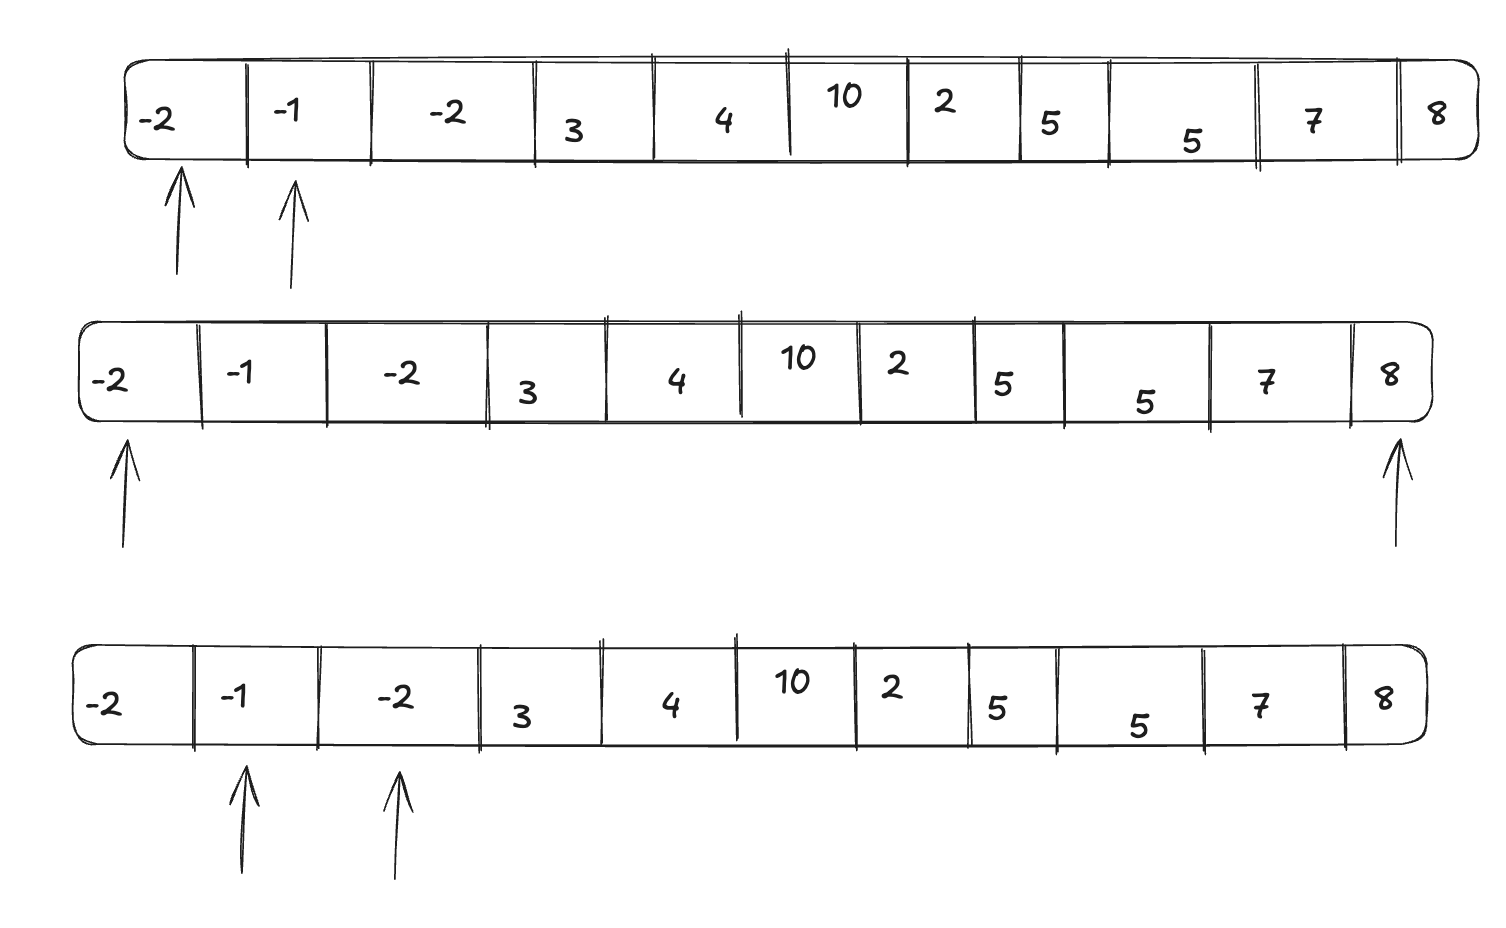

In [47]:
def maximum_subarray(nums):
    max_sum = 0
    for i in range(len(nums)):
        #ith element initializes the sum
        nums_sum = 0
        for j in range(i, len(nums)):
            #we keep on adding jth term
            nums_sum += nums[j]
            max_sum = max(max_sum, nums_sum)

    return max_sum

In [48]:
maximum_subarray([-2,1,-3,4,-1,2,1,-5,4])

6

In [49]:
maximum_subarray([-2, 1])


1

## Optimal Approach
We can use Kadan's Algorithm. Kadan's Algorithm adds the ith element when nums[i] > 0. For nums[i] < 0 it ignores.
- algorithm
    1. initilize max to - inf
    2. start iterating in the array (i -> len(array))
    -    3. initialize sum = array[i]
    -    5. max = max(sum, max)
    -    4. if nums[i] < 0:
            nums=0


In [54]:
def max_subarray(nums):
    import math
    max_sum = -(math.inf)
    nums_sum = 0

    for i in range(nums):
        nums_sum += nums[i]
        max_sum = max(nums_sum, max_sum)

        if nums_sum < 0:
            nums_sum = 0
            
    return max_sum

    


In [55]:
maximum_subarray([-2,1,-3,4,-1,2,1,-5,4])

6

# Best Time to Buy and Sell Stock

Here we are given an array which consists of prices of stock on 0->n days. We have to find the maximum profit. A stock sells higher / has max profit when price[j] > price[i], where i < j.
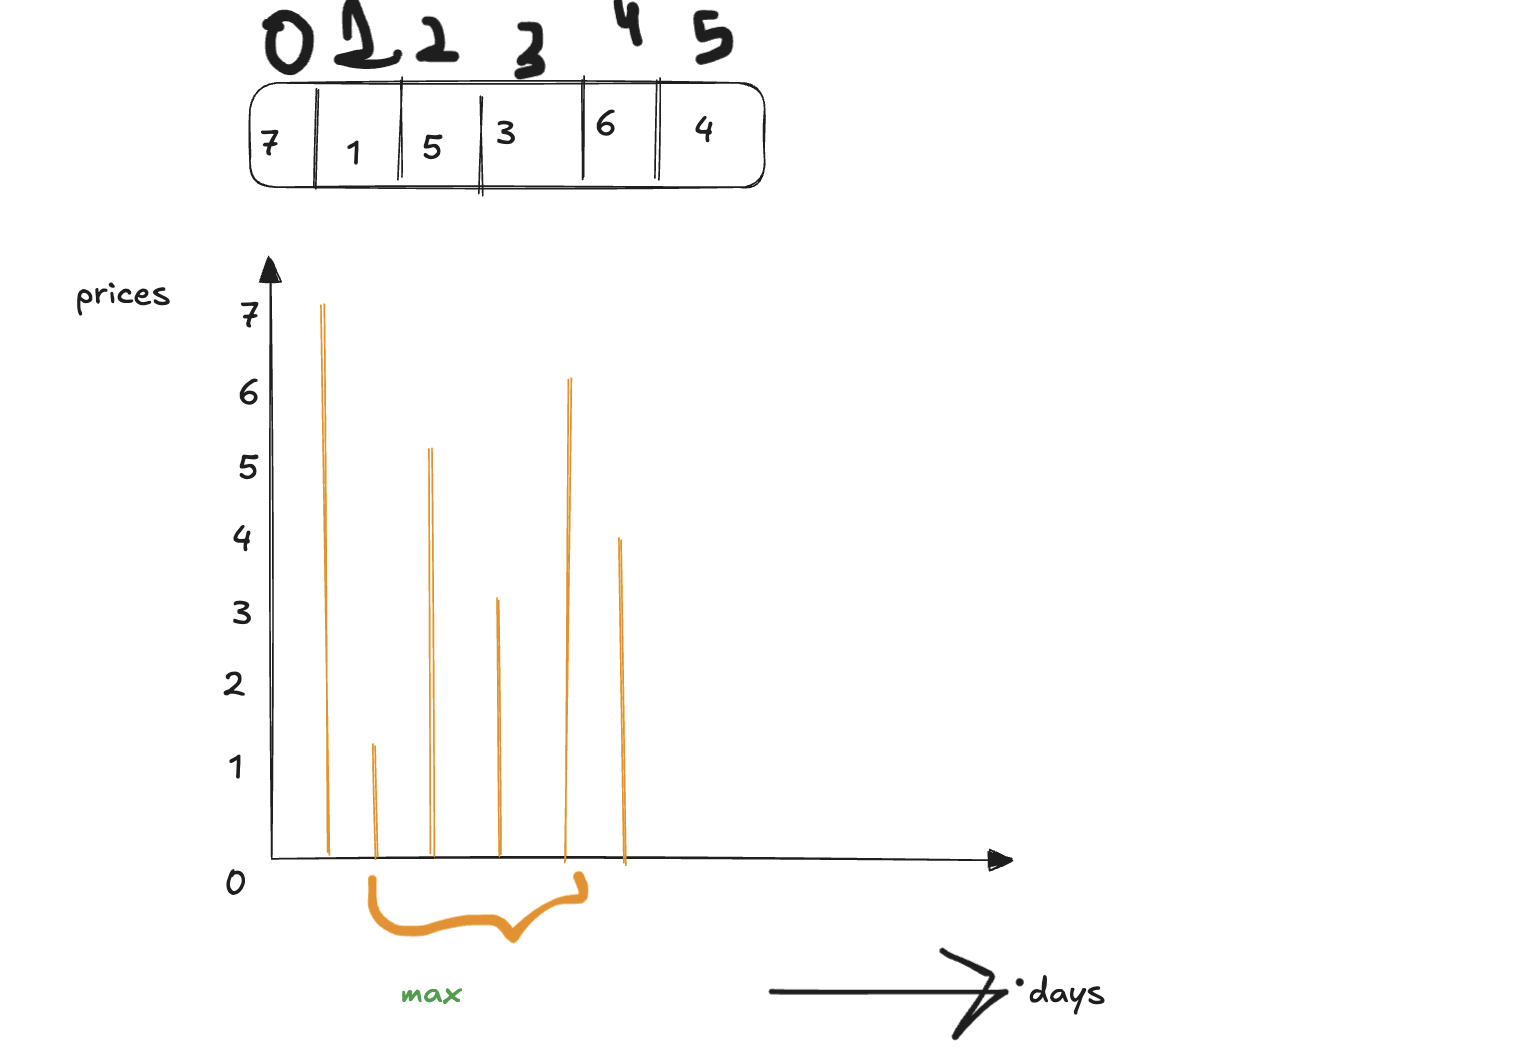

### Bruteforce
One of the most basic approach can be using two loop traversals. We start one loop at i and other loop at j=i+1, both ending at len(arr). We compare both arr[i] and arr[j]. then diff=arr[j] - arr[i]. If diff > max_diff, max_diff = diff

In [70]:
def maxProfit(nums):
    profit = 0

    for i in range(len(nums)):
        for j in range(i+1, len(nums)):
            diff = nums[j] - nums[i]
            profit = max(diff, profit)

    return profit

In [71]:
maxProfit([7,1,5,3,6,4])

5

# Optimal
To make the previous apporach better we keep a track of min element. Then we compare that min with each arr[i]. We then compute profit and assign to max if more than previous

In [72]:
def maxProfit(nums):
    minEle = 0
    profit = 0

    for i in range(len(nums)):
        diff = nums[i] - minEle
        profit = max(profit, diff)
        minEle = min(nums[i], minEle)

    return profit

In [73]:
maxProfit([7,1,5,3,6,4])

7